In [5]:
#库导入  
import numpy as np  
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense,SimpleRNN,LSTM,GRU
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [6]:
#读文件
df = pd.read_csv("600519.csv")

In [7]:
df=df[['tradeDate','openPrice']]

In [8]:
training_set=df.iloc[0:3000,1:2].values #训练集
test_set=df.iloc[3001:,1:2].values #测试集

In [9]:
#归一化
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
test_set=sc.transform(test_set)

In [10]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

In [11]:
#构建训练集
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
#打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train=np.reshape(x_train,(x_train.shape[0],60,1))

In [13]:
#测试集
for i in range(60,len(test_set)):
    x_test.append(test_set[i-60:i,0])
    y_test.append(test_set[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],60,1))

In [14]:
#模型 
from tensorflow.keras.layers import LSTM
model=tf.keras.Sequential([
    LSTM(80,return_sequences=True),
    Dropout(0,2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='mean_squared_error')

chekpoint_save_path='./checkpoint/stock.weights.h5'

if os.path.exists(chekpoint_save_path+'.index'):
    print('-------------load the model------------------')
    model.load_weights(chekpoint_save_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=chekpoint_save_path,
                                              save_weights_only=True,
                                              save_best_only=True,
                                              monitor='val_loss')
 

In [15]:
#模型训练
history=model.fit(x_train,y_train,batch_size=64,epochs=50,
                  validation_data=(x_test,y_test),
                 validation_freq=1,callbacks=[cp_callback])
model.summary()

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0260 - val_loss: 0.0015
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 8.9935e-04 - val_loss: 8.4327e-04
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.7699e-04 - val_loss: 8.2885e-04
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.9806e-04 - val_loss: 6.1920e-04
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.8688e-04 - val_loss: 5.9173e-04
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.3717e-04 - val_loss: 6.2771e-04
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.0276e-04 - val_loss: 5.8190e-04
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.7899e-04 - val_loss: 7.6401e-04
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.6989e-04 - val_loss: 5.8857e-04
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.1893e-04 - val_loss: 5.2086e-04
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.2720e-04 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 80)         │        26,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,225 (1.13 MB)

 Trainable params: 98,741 (385.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 197,484 (771.43 KB)

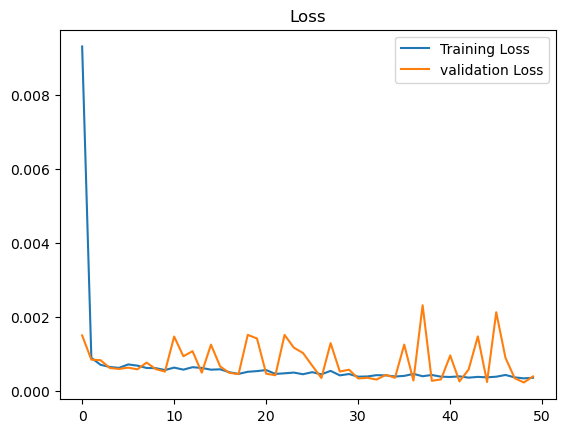

In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


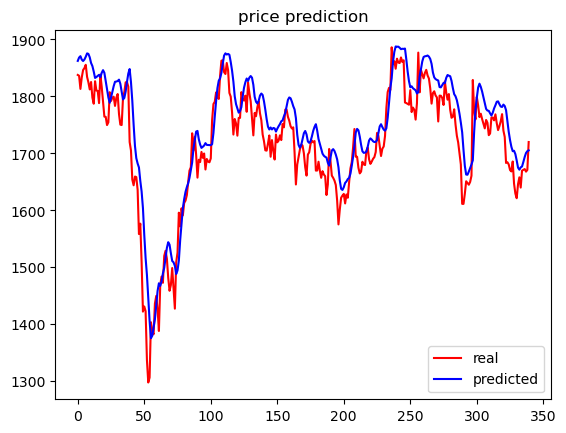

In [17]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
real_stock_price=sc.inverse_transform(test_set[60:])
plt.plot(real_stock_price,color='red',label='real')
plt.plot(predicted_stock_price,color='blue',label='predicted')
plt.title("price prediction")
plt.legend()
plt.show()

In [18]:
mse=mean_squared_error(predicted_stock_price,real_stock_price)
rmse=math.sqrt(mse)
mae=mean_absolute_error(predicted_stock_price,real_stock_price)
mse,rmse,mae

(2320.3525698072913, 48.17003809223417, 38.200290639361214)

In [19]:
dfp = pd.read_csv("600519-p.csv")
dfp=dfp[['tradeDate','openPrice']]

FileNotFoundError: [Errno 2] No such file or directory: '600519-p.csv'

In [ ]:
p_set=dfp.iloc[:,1:2].values #测试集

In [ ]:
p_set=sc.transform(p_set)

In [ ]:
x_p=[]
y_p=[]
for i in range(60,len(p_set)):
    x_p.append(p_set[i-60:i,0])
    y_p.append(p_set[i,0])
x_p,y_p=np.array(x_p),np.array(y_p)
x_p=np.reshape(x_p,(x_p.shape[0],60,1))

In [ ]:
pred_stock_price=model.predict(x_p)
pred_stock_price=sc.inverse_transform(pred_stock_price)
preal_stock_price=sc.inverse_transform(p_set[60:])
plt.plot(preal_stock_price,color='red',label='real')
plt.plot(pred_stock_price,color='blue',label='predicted')
plt.title("price prediction")
plt.legend()
plt.show()

In [ ]:
pmse=mean_squared_error(pred_stock_price,preal_stock_price)
prmse=math.sqrt(pmse)
pmae=mean_absolute_error(pred_stock_price,preal_stock_price)
pmse,prmse,pmae